<a href="https://colab.research.google.com/github/madhumaram/microservicesfirstproject/blob/master/sklearn_bayesian_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# example of Gaussian naive bayes

#importing libraries
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state
=1)

In [7]:
import numpy as np
from scipy.stats import norm
# fit a probability distribution to a univariate data sample
def fit_distribution(data): 
  # estimate parameters 
  mu = np.mean(data) 
  sigma = np.std(data) 
  print(mu, sigma)
  # fit distribution
  dist = norm(mu, sigma) 
  return dist
  

We start by separating the values of X that have corresponding y equal to 0.

In [8]:
# sort data into 0 class 
Xy0 = X[y == 0]

In the code cell below, define the variable Xy1 which contains those values of X for which y is equal to 1.

In [9]:
# sort data into 1 class
Xy1 = X[y == 1]


In [10]:
print(Xy0.shape, Xy1.shape)

(50, 2) (50, 2)


It'll also be useful to plot our data, with class labels 0 in red, and class labels 1 in black. We can see that each group looks approximately Gaussian, with good separation between the two groups. So there's hope in building a good prediction model!

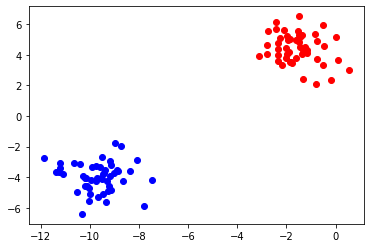

In [11]:
import matplotlib.pyplot as plt
plt.scatter(Xy0[:,0], Xy0[:,1], c='red') # class 0 
plt.scatter(Xy1[:,0], Xy1[:,1], c='blue') # class 1 
plt.show()

We can then use these groups to calculate the prior probabilities for a data sample belonging to each group. This will be 50% exactly, given that we've created the same number of examples in each of the two classes;
nevertheless, we will calculate these priors for completeness. We start with the prior for Xy0 .

In [12]:
# calculate priors
priory0 = len(Xy0) / len(X)


Following what we just did, in the code below calculate the prior for Xy1 

In [13]:
priory1 = len(Xy1) / len(X)

Below, we print the probabilities:

In [14]:
print(priory0, priory1)

0.5 0.5


Finally, we can call the fit_distribution() function that we defined to prepare a probability
distribution for each variable, for each class label. Run the code cell below:

In [15]:
# create PDFs for y==0
distX1y0 = fit_distribution(Xy0[:, 0])
distX2y0 = fit_distribution(Xy0[:, 1])

-1.5632888906409914 0.787444265443213
4.426680361487157 0.958296071258367


In the code cell below, compute the PDFs parameters for Xy1 .

In [16]:
# create PDFs for y==1
distX1y1 = fit_distribution(Xy1[:, 0])
distX2y1 = fit_distribution(Xy1[:, 1])

-9.681177100524485 0.8943078901048118
-3.9713794295185845 0.9308177595208521


we can use the prepared probabilistic model to make a prediction.
The independent conditional probability for each class label can be calculated using the prior for the class (50%) and the conditional probability of the value for each variable.
The probability() function defined below performs this calculation. The value returned is a relative score rather than a probability, as the quantity is not normalized to  () in Bayes' formula, that normalization is handled by the corresponding sklearn function, which we will explore later below.

In [17]:
# calculate the independent conditional probability 
def probability(X, prior, dist1, dist2):
    return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

We can use this function to calculate the probability for an example belonging to each class. First, we can select an example to be classified - in this case, the first example in the dataset.

In [18]:
# classify one example
Xsample, ysample = X[0], y[0]

In the code cell below, we can calculate the score of the example belonging to the first class

In [19]:
py0 = probability(Xsample, priory0, distX1y0, distX2y0)

Follow the code above to compute the probabily for the second class.

In [20]:
py1 = probability(Xsample, priory1, distX1y1, distX2y1)

Next, we compute the probabilities:

In [21]:
print('P(y=0 | %s) = %.3f' % (Xsample, py0*100)) 
print('P(y=1 | %s) = %.3f' % (Xsample, py1*100))

P(y=0 | [-0.79415228  2.10495117]) = 0.348
P(y=1 | [-0.79415228  2.10495117]) = 0.000


It provides three implementations, one for each of the three main probability distributions; for example, BernoulliNB , MultinomialNB , and GaussianNB for binomial, multinomial, and Gaussian-
distributed input variables, respectively.
To use a sklearn Bayes' model, first, the model is defined, then it's fit on the training dataset. Once fit, probabilities can be predicted via the predict_proba() function, and class labels can be predicted directly via the predict() function.

The complete example of fitting a Gaussian Bayes' model ( GaussianNB ) to the same test dataset is given below.

In [22]:
# example of Gaussian naive bayes
#importing libraries
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state =1)

In [23]:
# define the model
model = GaussianNB()
# fit the model
model.fit(X, y)
# select a single sample
Xsample, ysample = [X[0]], y[0]
# make a probabilistic prediction
yhat_prob = model.predict_proba(Xsample)

In [25]:
print('Predicted Probabilities: ', yhat_prob)

# make a classification prediction
yhat_class = model.predict(Xsample)
print('Predicted Class: ', yhat_class)
print('Truth: y=%d' % ysample)

Predicted Probabilities:  [[1.00000000e+00 5.52387327e-30]]
Predicted Class:  [0]
Truth: y=0


Running the example fits the model on the training dataset, then makes predictions for the same first example that we used in the prior example.

In [26]:
print('Xsample:', Xsample)
print('Predicted Probabilities: ', yhat_prob) 
# make a classification prediction
yhat_class = model.predict(Xsample) 
print('Predicted Class: ', yhat_class) 
print('True Class: y=%d' % ysample)

Xsample: [array([-0.79415228,  2.10495117])]
Predicted Probabilities:  [[1.00000000e+00 5.52387327e-30]]
Predicted Class:  [0]
True Class: y=0


To help visualize this, we repeat the plot of our data but now adding the point whose class we are trying to predict, as a black 'X':

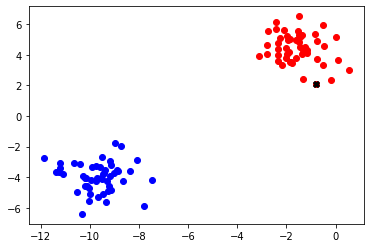

In [27]:
plt.scatter(Xy0[:,0], Xy0[:,1], c='red') #class 0 
plt.scatter(Xy1[:,0], Xy1[:,1], c='blue') #class 1 
plt.scatter(Xsample[0][0], Xsample[0][1], c='black', marker='X') 
plt.show()

Let's try again, this time for a data point we haven't seen before:

Predicted Probabilities:  [[1.13217562e-40 1.00000000e+00]]
Predicted Class:  [1]


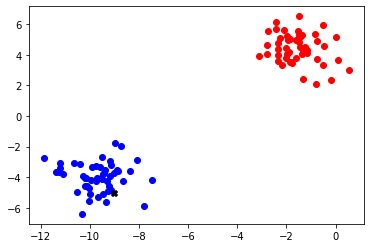

In [28]:
Xsample = np.array([[-9.0, -5.0]]) #new data point print('Xsample:', Xsample)
# make a probabilistic prediction
yhat_prob = model.predict_proba(Xsample)
print('Predicted Probabilities: ', yhat_prob)
yhat_class = model.predict(Xsample)
print('Predicted Class: ', yhat_class)
plt.scatter(Xy0[:,0], Xy0[:,1], c='red') #class 0 
plt.scatter(Xy1[:,0], Xy1[:,1], c='blue') #class 1 
plt.scatter(Xsample[0][0], Xsample[0][1], c='black', marker='X') 
plt.show()

In [5]:
# sort data into 0 class

Xy0 = X[y == 0]
# sort data into 1 class

Xy1 = X[y == 1]

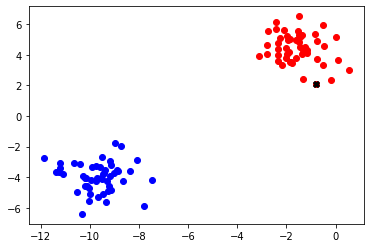

In [6]:
import matplotlib.pyplot as plt
plt.scatter(Xy0[:,0], Xy0[:,1], c='red') #class 0
plt.scatter(Xy1[:,0], Xy1[:,1], c='blue') #class 1
plt.scatter(Xsample[0][0], Xsample[0][1], c='black', marker='X')
plt.show()

Xsample: [[-9. -5.]]
Predicted Probabilities:  [[1.13217562e-40 1.00000000e+00]]
Predicted Class:  [1]


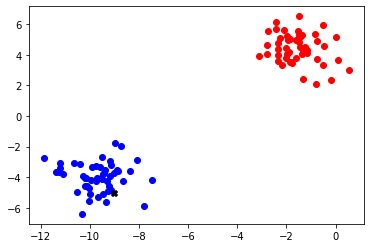

In [7]:
import numpy as np
Xsample = np.array([[-9.0, -5.0]]) #new data point

print('Xsample:', Xsample)
# make a probabilistic prediction
yhat_prob = model.predict_proba(Xsample)
print('Predicted Probabilities: ', yhat_prob)
yhat_class = model.predict(Xsample)
print('Predicted Class: ', yhat_class)
plt.scatter(Xy0[:,0], Xy0[:,1], c='red') #class 0
plt.scatter(Xy1[:,0], Xy1[:,1], c='blue') #class 1
plt.scatter(Xsample[0][0], Xsample[0][1], c='black', marker='X')
plt.show()